In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne
from BrainEmbeddingPhase2.B2BNet.cluster_scoring import *


In [2]:
prob_matrices_results = get_prob_matrices()

100%|██████████| 216/216 [00:00<00:00, 891.37it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [3]:

matrix_for_scoring, sample_weight= generate_prob_matrix_with_cluster_labels(
        *prob_matrices_results[:-8])


In [4]:
a1a3_clusters = prob_matrices_results[4]
typical_clusters = prob_matrices_results[5]

In [5]:
print(a1a3_clusters)

[{32, 34, 67, 36, 70, 7, 43, 46, 53, 22, 87, 58}, {68, 10, 12, 44, 76, 47, 17, 18, 51, 52, 83, 54, 84, 25, 31}, {0, 8, 9, 13, 16, 19, 21, 24, 26, 29, 30, 39, 48, 50, 56, 57, 62, 66, 73, 74, 85}, {1, 2, 3, 11, 14, 15, 20, 23, 27, 28, 37, 38, 42, 55, 59, 60, 61, 63, 72, 75, 77, 78, 79, 81, 82, 86}, {64, 33, 65, 35, 4, 5, 6, 69, 40, 41, 71, 45, 80, 49}]


In [6]:
print(typical_clusters)

[{32, 2, 5, 70, 39, 73, 10, 74, 77, 15, 49, 51, 55, 57, 26, 59, 31}, {65, 4, 37, 38, 36, 69, 47, 18, 50, 28, 30}, {0, 67, 35, 6, 7, 9, 11, 44, 75, 52, 21, 53, 54, 29}, {34, 68, 40, 41, 72, 43, 78, 83, 20, 22, 24, 58, 27, 61}, {1, 3, 8, 12, 13, 14, 16, 17, 19, 23, 25, 33, 42, 45, 46, 48, 56, 60, 62, 63, 64, 66, 71, 76, 79, 80, 81, 82}]


In [7]:
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)
list_cluster_label = np.zeros(172)
for i in range(172):
    if i < 88:
        for cluster_idx in range(len_a1a3_clusters):
            if i in a1a3_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx
    if i >= 88:
        for cluster_idx in range(len_typical_clusters):
            if i-88 in typical_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx +  len_a1a3_clusters 
                    
    


In [8]:
list_cluster_label

array([2., 3., 3., 3., 4., 4., 4., 0., 2., 2., 1., 3., 1., 2., 3., 3., 2.,
       1., 1., 2., 3., 2., 0., 3., 2., 1., 2., 3., 3., 2., 2., 1., 0., 4.,
       0., 4., 0., 3., 3., 2., 4., 4., 3., 0., 1., 4., 0., 1., 2., 4., 2.,
       1., 1., 0., 1., 3., 2., 2., 0., 3., 3., 3., 2., 3., 4., 4., 2., 0.,
       1., 4., 0., 4., 3., 2., 2., 3., 1., 3., 3., 3., 4., 3., 3., 1., 1.,
       2., 3., 0., 7., 9., 5., 9., 6., 5., 7., 7., 9., 7., 5., 7., 9., 9.,
       9., 5., 9., 9., 6., 9., 8., 7., 8., 9., 8., 9., 5., 8., 6., 7., 6.,
       5., 5., 9., 8., 7., 6., 6., 6., 5., 8., 8., 9., 8., 7., 9., 9., 6.,
       9., 5., 6., 5., 7., 7., 7., 5., 9., 5., 8., 5., 9., 8., 9., 9., 9.,
       6., 9., 7., 8., 6., 5., 9., 8., 5., 5., 7., 9., 5., 8., 9., 9., 9.,
       9., 8.])

In [9]:
diver_a1a3_g1cent, diver_a1a3_g2cent, diver_typical_g1cent, diver_typical_g2cent = prob_matrices_results[-4:]

In [10]:
df_list_cluster_label = pd.DataFrame(list_cluster_label)

In [11]:
print(df_list_cluster_label)

       0
0    2.0
1    3.0
2    3.0
3    3.0
4    4.0
..   ...
167  9.0
168  9.0
169  9.0
170  9.0
171  8.0

[172 rows x 1 columns]


In [12]:
diver_a1a3_cents = np.concatenate([diver_a1a3_g1cent,diver_a1a3_g2cent], axis=1 )
diver_typical_cents = np.concatenate([diver_typical_g1cent,diver_typical_g2cent], axis=1 )


In [13]:
df_b_cents = pd.DataFrame(np.concatenate([diver_a1a3_cents,diver_typical_cents]))

In [14]:
df_b_cents_with_label = pd.concat([df_b_cents, df_list_cluster_label],axis=1) 

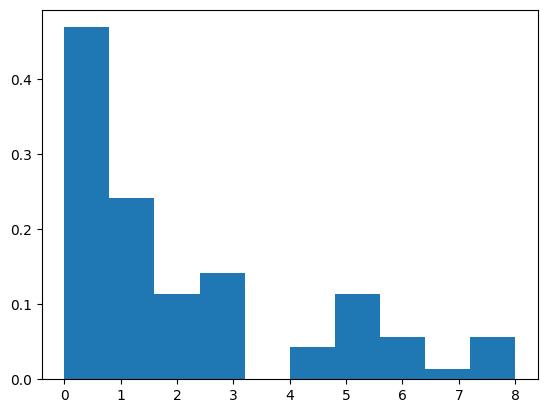

In [15]:
hist_smallest = []
for i in range(88):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[:88],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[:88][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()


In [16]:
hist_smallest = []
sorted_diver_a1a3_cents  = np.argsort(df_b_cents.values[:88,:5],axis=1)
a1a3_labels_list = df_list_cluster_label.values.reshape(-1)[:88]
for i in range(88):
    hist_smallest.append(int(np.where(sorted_diver_a1a3_cents[i]  ==  a1a3_labels_list[i]) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [17]:
np.shape(df_b_cents.values)

(172, 10)

In [18]:
np.count_nonzero(np.argmin(df_b_cents.values[88:],axis=1)> 5)

23

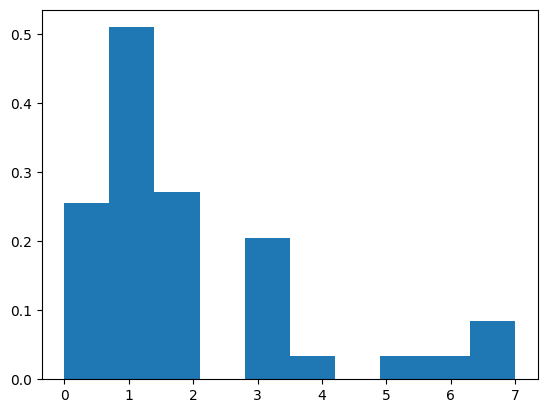

In [19]:
hist_smallest = []
for i in range(84):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[88:],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[88:][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()

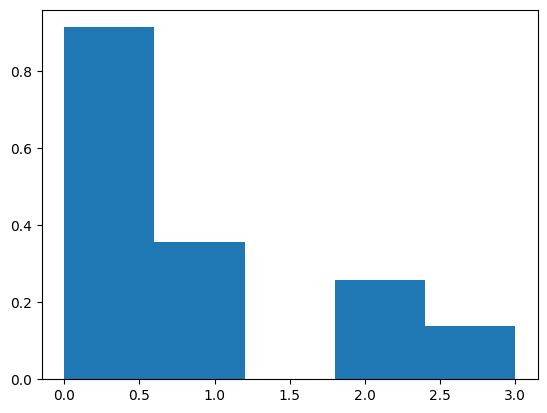

In [20]:
hist_smallest = []
sorted_diver_typical_cents  = np.argsort(df_b_cents.values[88:,5:],axis=1)
typical_labels_list = df_list_cluster_label.values.reshape(-1)[88:]
for i in range(84):
    hist_smallest.append(int(np.where(sorted_diver_typical_cents[i]  ==  typical_labels_list[i]-5) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [21]:
df_list_cluster_label.values.reshape(-1)

array([2., 3., 3., 3., 4., 4., 4., 0., 2., 2., 1., 3., 1., 2., 3., 3., 2.,
       1., 1., 2., 3., 2., 0., 3., 2., 1., 2., 3., 3., 2., 2., 1., 0., 4.,
       0., 4., 0., 3., 3., 2., 4., 4., 3., 0., 1., 4., 0., 1., 2., 4., 2.,
       1., 1., 0., 1., 3., 2., 2., 0., 3., 3., 3., 2., 3., 4., 4., 2., 0.,
       1., 4., 0., 4., 3., 2., 2., 3., 1., 3., 3., 3., 4., 3., 3., 1., 1.,
       2., 3., 0., 7., 9., 5., 9., 6., 5., 7., 7., 9., 7., 5., 7., 9., 9.,
       9., 5., 9., 9., 6., 9., 8., 7., 8., 9., 8., 9., 5., 8., 6., 7., 6.,
       5., 5., 9., 8., 7., 6., 6., 6., 5., 8., 8., 9., 8., 7., 9., 9., 6.,
       9., 5., 6., 5., 7., 7., 7., 5., 9., 5., 8., 5., 9., 8., 9., 9., 9.,
       6., 9., 7., 8., 6., 5., 9., 8., 5., 5., 7., 9., 5., 8., 9., 9., 9.,
       9., 8.])

In [22]:
df_b_cents_with_label

0          1          2         3          4          5  \
0     2.175623   2.771111   1.953454  1.012975   1.934589   3.987111   
1     3.973318   3.215849   4.437214  2.043063   3.196663   4.923865   
2     5.527543   4.854539   4.963425  2.502378   4.689024   7.542704   
3     6.277041   5.407250   6.498120  3.866451   5.614167   7.861591   
4    13.355032  10.872036  13.129285  7.471148  12.192442  15.895734   
..         ...        ...        ...       ...        ...        ...   
167   1.695408   2.131542   1.572993  1.124639   1.179755   2.002686   
168   8.121377   6.645053   7.414428  3.612953   6.070710   8.982171   
169   0.542188   1.282873   1.110860  0.718710   0.612593   0.896362   
170   0.995851   1.870178   1.433520  1.123444   0.857371   1.165514   
171   7.407912   6.115836   6.758286  2.822095   6.060498  10.738202   

             6         7         8         9    0  
0     1.234858  2.395349  1.090673  1.584422  2.0  
1     3.128577  2.780794  2.805868  2.623629  3.0  
2     4.156636  3.986402  3.420150  3.529512  3.0  
3     6.475444  5.114115  5.035048  5.656768  3.0  
4    11.230342  8.628477  7.453252  9.779650  4.0  
..         ...       ...       ...       ...  ...  
167   1.666672  1.892970  1.420324  0.816021  9.0  
168   5.543187  4.721715  3.323286  4.529570  9.0  
169   0.937357  1.240140  1.051106  0.391288  9.0  
170   1.456247  1.827075  1.526295  0.647708  9.0  
171   5.055000  4.711506  3.929296  5.116343  8.0  

[172 rows x 11 columns]

In [23]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

df_b_cents_with_label.to_excel(prefix+experiment_path +"divergence_from_centroids_dig_replaced_with_cluster_label0831.xlsx")

In [24]:
reg_list, reg_predict_list = cluster_scoring_training(matrix_for_scoring, sample_weight)

In [25]:
predicted_score = np.array(reg_predict_list).T

In [26]:
print(np.shape(sample_weight))

(172, 10)


In [27]:
print(np.shape(predicted_score))

(172, 10)


In [28]:
np.shape(matrix_for_scoring[:,:,-1])

(172, 10)

In [29]:
df_cluster_label = pd.DataFrame(np.argmax(matrix_for_scoring[:,:,-1],axis=1))
df_cluster_label.columns=['cluster_label']

In [30]:
df_predicted_score=pd.DataFrame(predicted_score)

In [31]:
df_argmax_score = pd.DataFrame(np.argmax(df_predicted_score.values, axis=1))

In [32]:
df_argmax_score.columns =['predicted_label']

In [33]:
df_predicted_score_with_argmax = pd.concat([df_predicted_score, df_argmax_score],axis=1)
df_predicted_score_with_labels = pd.concat([df_predicted_score_with_argmax,df_cluster_label], axis=1)

In [42]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
df_predicted_score_with_labels.to_excel(prefix+experiment_path +"leave_none_skewnorm_fglb_diag_scoring_v3_predicted_0831.xlsx")

In [41]:
df_predicted_score_with_labels

0         1         2         3         4         5         6  \
0   -0.263030  0.287065  0.315387  0.753123  0.348486 -0.003511 -0.217488   
1    0.127838  0.413718 -0.108175  0.547796  0.371941  0.080749  0.287188   
2    0.159672  0.237275  0.004487  0.556948  0.271393  0.010319  0.269044   
3    0.260325  0.333709  0.936405  0.657998  0.260568 -0.116893  0.262263   
4   -0.077215  0.134473 -0.145861  0.393769  0.073811 -0.129893  0.091396   
..        ...       ...       ...       ...       ...       ...       ...   
167  0.462429 -0.365555  0.323914  0.042878  0.386697  0.186220  0.440366   
168 -0.160919 -0.034701 -0.679809  0.367091  0.104282 -0.142165  0.224738   
169 -0.091996  0.309919 -0.394882 -0.814866  0.046732  1.814776 -0.147211   
170  0.463371 -0.334236  0.200368  0.681917 -0.118705  0.677342  0.044472   
171  0.054563  0.070037 -0.656576  0.473382  0.168811 -0.027658  0.241663   

            7         8         9  predicted_label  cluster_label  
0   -0.266711 -0.558156  0.521160                3              2  
1   -0.145978  0.525931  0.484912                3              3  
2   -0.362267  0.087642  0.334822                3              3  
3   -0.869977  0.434705  0.287120                2              3  
4    0.469859  0.062181  0.404387                7              4  
..        ...       ...       ...              ...            ...  
167 -0.270634 -0.276162  0.509843                9              9  
168  0.629484  0.699696  0.520822                8              9  
169 -0.229900 -0.389117  0.530237                5              9  
170 -0.271626 -0.131626  0.520139                3              9  
171  0.659178  0.450097  0.377221                7              8  

[172 rows x 12 columns]

In [43]:
np.shape(matrix_for_scoring[:,:,-1])

(172, 10)

In [44]:
for reg in reg_list:
    print(reg.coef_)
    print(reg.intercept_)

[ 2.61207282  0.87032205  7.63336186  4.64673771 -4.24649158  3.51805651
 -9.83060153 -1.24450705  3.02647454 -5.72494356]
-0.0889822956717064
[-3.37117045  7.15496742  9.40185424 -4.52528966 -1.57504575 -2.66407911
  3.61912992 -5.22596301 -0.35486575  4.17414766]
-0.05057947380122668
[  2.96549928   1.74555206  27.44512908   1.91219662   1.20821515
   5.45486749 -27.14020602  -0.7378754   -2.31809909   0.37382472]
-0.11833957027430791
[ 1.65709049  1.7510843   5.69187197  5.47285295 -6.35864902  5.6557209
 -1.81323934 -1.29803296 -6.80024387 -0.75703423]
0.4190391705259502
[ 0.70677232  1.03706768  3.48263482  3.92212692 -8.90173585  5.34207244
 -1.48489304  2.93632961 -4.29679513 -0.55173292]
0.058101939979254114
[-2.22264105 -0.15022406 -1.04859886  0.58666853 -0.22327487  4.25102189
  0.92756372  0.47166844 -0.37099401 -0.48875555]
-0.12989189790961767
[ 0.7932191   0.52478606 -0.74134764  3.36815119 -4.13954532  3.12657438
 -2.45822533  1.59932983 -0.94353519  0.29840582]
-0.0576

In [35]:
 a1a3_g1cent_params, a1a3_g2cent_params, typical_g1cent_params, typical_g2cent_params = prob_matrices_results[8:-4]

In [51]:
print(a1a3_g1cent_params[0][0])

(37556799.33914517, 0.8569743142245967, 5.346692839465852)


In [36]:
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)

In [54]:
def plot_clusters_from_centroids_hist_with_pdf(
    ax, diver, params, row_clusters, col_clusters, shifted_row, shifted_col):
    len_row_clusters = len(row_clusters) 
    len_col_clusters = len(col_clusters)
    
    for row_idx in range(len_row_clusters):
        row = ax[row_idx + shifted_row] 
        for col_idx in range(len_col_clusters):
            col = row[col_idx + shifted_col]
            
            ser = diver[list(row_clusters[row_idx]), col_idx]
            
            # print(np.shape(ser))
            # plot normed histogram
            col.hist(ser, density=True, bins=5, color = "gainsboro", ec="gainsboro")

            # find minimum and maximum of xticks, so we know
            # where we should compute theoretical distribution

            # xt = plt.xticks()[0]  
            xmin, xmax = min(ser), max(ser) 
            lnspc = np.linspace(xmin, xmax, len(ser))

            # fitting_params = stats.skewnorm.fit(ser) # get mean and standard deviation  
            pdf_g = stats.skewnorm.pdf(lnspc, *params[row_idx][col_idx]) # now get theoretical values in our interval  
            col.plot(lnspc, pdf_g, label="Skewnorm", c='tomato') # plot it

<Figure size 640x480 with 0 Axes>

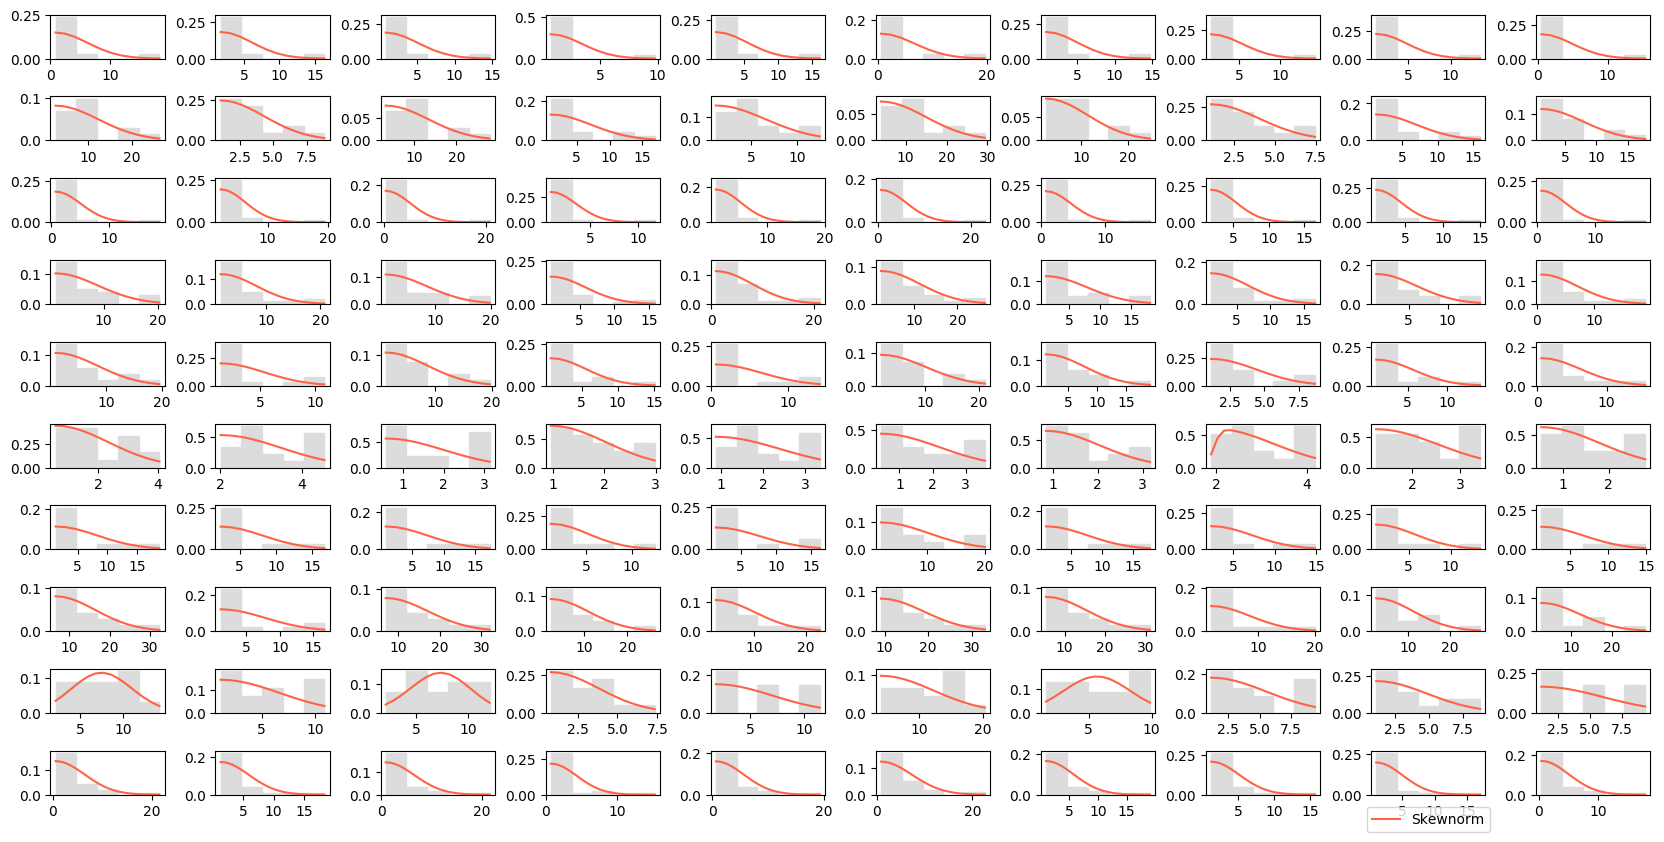

In [56]:

######to centroids
plt.figure()
# figsize=(200,100), dpi=100
len_clusters = len_a1a3_clusters + len_typical_clusters
fig, ax = plt.subplots(nrows=len_clusters, ncols=len_clusters, figsize=(20, 10))

plot_clusters_from_centroids_hist_with_pdf(
    ax, diver_a1a3_g1cent, a1a3_g1cent_params, a1a3_clusters, a1a3_clusters, 0, 0)

plot_clusters_from_centroids_hist_with_pdf(
    ax, diver_a1a3_g2cent, a1a3_g2cent_params, a1a3_clusters, typical_clusters, 0, len_a1a3_clusters)

plot_clusters_from_centroids_hist_with_pdf(
    ax, diver_typical_g1cent, typical_g1cent_params, typical_clusters, a1a3_clusters, len_a1a3_clusters, 0)

plot_clusters_from_centroids_hist_with_pdf(
    ax, diver_typical_g2cent, typical_g2cent_params, typical_clusters, typical_clusters, len_a1a3_clusters, len_a1a3_clusters)


    # diver_a1a3_g1cent, diver_a1a3_g2cent, diver_typical_g1cent, diver_typical_g2cent
    # a1a3_g1cent_params, a1a3_g2cent_params, typical_g1cent_params, typical_g2cent_params


plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)  # create some space below the plots by increasing the bottom-value
ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

plt.show()

In [64]:
print(f"a1a3_g1cent_params: \n {a1a3_g1cent_params},\n"
      f"a1a3_g2cent_params: \n{a1a3_g2cent_params}, \n "
      f"typical_g1cent_params: \n {typical_g1cent_params}, \n"
      f"typical_g2cent_params: \n {typical_g2cent_params} ")

a1a3_g1cent_params: 
 [[(37556799.33914517, 0.8569743142245967, 5.346692839465852), (22358350.308039926, 1.7088779740514042, 4.4028354249573045), (27602302.217443615, 0.7833416474881301, 4.2738235702116825), (21405179.715987578, 0.7210479050545049, 2.6957771666346133), (39888708.98536315, 0.829665552083608, 4.6325620386574755)], [(20739685.694171704, 2.543722821828431, 9.835939481338954), (30605552.950587004, 1.0824842331823872, 3.222625977029013), (34376332.73784238, 3.289844372119955, 10.080992108068806), (21467076.30710624, 1.0521608612728626, 6.143327513745369), (57013820.0918148, 1.2457527314592967, 5.332178189382221)], [(9549903.393799322, 0.7771729063215411, 4.3133436793181055), (25161766.24371516, 2.156845581763576, 4.110532733681302), (7679846.609039456, 0.4161296735589296, 4.7643885542440465), (7884033.108381005, 0.8692978889857019, 2.6578243261072965), (73263808.08361284, 0.981500607153815, 4.332456083413101)], [(6272140.709245004, 1.1619353298906492, 7.727415827075461), (42

(172, 12)

(172, 10)

99

1

96

In [65]:
with pd.ExcelWriter(prefix+experiment_path+"leave_none_skewnorm_fglb_diag_scoring_0831training.xlsx") as writer: 
    for x in range(10):
        df_xth_prob_matrix = pd.DataFrame(matrix_for_scoring[:,x,:-1])
        df_xth_cluster_label = pd.DataFrame(matrix_for_scoring[:,x,-1])
        df_xth_cluster_predcit = pd.DataFrame(reg_predict_list[x])
        df_xth_debug = pd.concat([df_xth_prob_matrix, df_xth_cluster_label,df_xth_cluster_predcit ], axis = 1)
        sheet_str = f"No.{x}"
        df_xth_debug.to_excel(writer, sheet_name = sheet_str)

        #np.count_nonzero(df_xth_cluster_label.values * df_xth_cluster_predcit.values > 0)

In [58]:
print(np.shape(predicted_score))
print(np.shape(df_cluster_label))

(172, 10)
(172, 1)


In [72]:
df_matrix_for_scoring = pd.DataFrame(matrix_for_scoring[:,:,:-1].reshape(172,-1))

In [73]:
df_cluster_score = pd.DataFrame(matrix_for_scoring[:,:,-1])

In [74]:
df_all = pd.concat([df_matrix_for_scoring, df_predicted_score, df_cluster_score],axis=1)

In [75]:
df_all.to_excel(prefix+experiment_path+"leave_none_skewnorm_fglb_diag_scoring_all0831.xlsx")

In [68]:
print(matrix_for_scoring[0,:,-1])

[ 0.5  0.5  1.   0.5  0.5 -1.  -1.  -1.  -1.  -1. ]


In [ ]:
with pd.ExcelWriter(prefix+experiment_path+"leave_none_skewnorm_fglb_with_socore_label_0831training.xlsx") as writer:
    for i in range(172):
        df = pd.DataFrame(matrix_for_scoring[i])
        sheet_str = f"No.{i}"
        df.to_excel(writer, sheet_name = sheet_str)
    

In [76]:
print(np.shape(df_predicted_score))

(172, 10)
